<a href="https://colab.research.google.com/github/SherwynM/Music-Analysis/blob/main/Music_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1><u>Music Analysis</u></h1>**

by : Sherwyn Tristen Diogo Misquitta

In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [687]:
music=pd.read_excel("music.xlsx")
music.tail(3)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Fav genre
733,2022-11-03 23:24:00,19.0,Other streaming service,6.0,Yes,No,Yes,Yes,No,120.0,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,Rap
734,2022-11-04 17:31:00,19.0,Spotify,5.0,Yes,Yes,No,No,No,170.0,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,Classical
735,2022-11-09 01:55:00,29.0,YouTube Music,2.0,Yes,No,No,Yes,Yes,98.0,...,Very frequently,Very frequently,Very frequently,Rarely,2.0,2.0,2.0,5.0,Improve,Hip hop


In [688]:
music.shape # There are 736 Observations and 32 Columns

(736, 32)

In [689]:
print(music['Fav genre'].unique())

['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Country' 'EDM'
 'Hip hop' 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']


<h4><b>Genres Avalaible In Our The Dataset:</b></br>
&nbsp&nbsp&nbsp&nbspLatin</br>
&nbsp&nbsp&nbsp&nbspRock</br>
&nbsp&nbsp&nbsp&nbspVideo Game Music</br>
&nbsp&nbsp&nbsp&nbspJazz</br>
&nbsp&nbsp&nbsp&nbspB&B</br>
&nbsp&nbsp&nbsp&nbspK pop</br>
&nbsp&nbsp&nbsp&nbspCountry</br>
&nbsp&nbsp&nbsp&nbspEDM</br>
&nbsp&nbsp&nbsp&nbspHip hop</br>
&nbsp&nbsp&nbsp&nbspPop</br>
&nbsp&nbsp&nbsp&nbspRap</br>
&nbsp&nbsp&nbsp&nbspClassical</br>
&nbsp&nbsp&nbsp&nbspMetal</br>
&nbsp&nbsp&nbsp&nbspFolk</br>
&nbsp&nbsp&nbsp&nbspLofi</br>
&nbsp&nbsp&nbsp&nbspGospel</br>



In [690]:
music['Month']=music['Timestamp'].dt.strftime("%B")

music.drop('Timestamp',inplace=True,axis='columns')

In [691]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Primary streaming service     735 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 733 non-null    object 
 4   Instrumentalist               732 non-null    object 
 5   Composer                      735 non-null    object 
 6   Exploratory                   736 non-null    object 
 7   Foreign languages             732 non-null    object 
 8   BPM                           629 non-null    float64
 9   Frequency [Classical]         736 non-null    object 
 10  Frequency [Country]           736 non-null    object 
 11  Frequency [EDM]               736 non-null    object 
 12  Frequency [Folk]              736 non-null    object 
 13  Frequ

In [692]:
music['Anxiety']=music['Anxiety'].astype('int64')
music['Depression']=music['Depression'].astype('int64')
music['Insomnia']=music['Insomnia'].astype('int64')
music['OCD']=music['OCD'].astype('int64')


music['Primary streaming service']=music['Primary streaming service'].astype('category')
music['Fav genre']=music['Fav genre'].astype('category' )
music['Instrumentalist']=music['Instrumentalist'].astype('category')
music['Foreign languages']=music['Foreign languages'].astype('category')
music['Exploratory']=music['Exploratory'].astype('category')
music['Composer']=music['Composer'].astype('category')
music['While working']=music['While working'].astype('category')
music['Month']=music['Month'].astype('category')



music['Frequency [Classical]']=music['Frequency [Classical]'].astype('category')
music['Frequency [Country]']=music['Frequency [Country]'].astype('category')
music['Frequency [EDM]']=music['Frequency [EDM]'].astype('category')
music['Frequency [Folk]']=music['Frequency [Folk]'].astype('category')
music['Frequency [Gospel]']=music['Frequency [Gospel]'].astype('category')
music['Frequency [Hip hop]']=music['Frequency [Hip hop]'].astype('category')
music['Frequency [Jazz]']=music['Frequency [Jazz]'].astype('category')
music['Frequency [K pop]']=music['Frequency [K pop]'].astype('category')
music['Frequency [Latin]']=music['Frequency [Latin]'].astype('category')
music['Frequency [Lofi]']=music['Frequency [Lofi]'].astype('category')
music['Frequency [Metal]']=music['Frequency [Metal]'].astype('category')
music['Frequency [Pop]']=music['Frequency [Pop]'].astype('category')
music['Frequency [R&B]']=music['Frequency [R&B]'].astype('category')
music['Frequency [Rap]']=music['Frequency [Rap]'].astype('category')
music['Frequency [Rock]']=music['Frequency [Rock]'].astype('category')
music['Frequency [Video game music]']=music['Frequency [Video game music]'].astype('category')
music['Music effects']=music['Music effects'].astype('category')


**Converted the Data Types to make it Memory/Performance Efficient**


In [693]:
music

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Fav genre,Month
0,18.0,Spotify,3.0,Yes,Yes,Yes,Yes,Yes,156.0,Rarely,...,Very frequently,Never,Sometimes,3,0,1,0,NaN,Latin,August
1,63.0,Pandora,1.5,Yes,No,No,Yes,No,119.0,Sometimes,...,Rarely,Very frequently,Rarely,7,2,2,1,NaN,Rock,August
2,18.0,Spotify,4.0,No,No,No,No,Yes,132.0,Never,...,Rarely,Rarely,Very frequently,7,7,10,2,No effect,Video game music,August
3,61.0,YouTube Music,2.5,Yes,No,Yes,Yes,Yes,84.0,Sometimes,...,Never,Never,Never,9,7,3,3,Improve,Jazz,August
4,18.0,Spotify,4.0,Yes,No,No,Yes,No,107.0,Never,...,Very frequently,Never,Rarely,7,2,5,9,Improve,R&B,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Yes,Yes,120.0,Very frequently,...,Rarely,Very frequently,Never,7,6,0,9,Improve,Rock,October
732,18.0,Spotify,1.0,Yes,Yes,No,Yes,Yes,160.0,Rarely,...,Never,Sometimes,Sometimes,3,2,2,5,Improve,Pop,November
733,19.0,Other streaming service,6.0,Yes,No,Yes,Yes,No,120.0,Rarely,...,Sometimes,Rarely,Rarely,2,2,2,2,Improve,Rap,November
734,19.0,Spotify,5.0,Yes,Yes,No,No,No,170.0,Very frequently,...,Never,Never,Sometimes,2,3,2,1,Improve,Classical,November


In [694]:
music.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.836957,4.794837,3.737772,2.635870
std,12.054970,3.028199,3.987261e+07,2.792710,3.029564,3.088797,2.840047
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


**Age Distribution**: Mean Age is 25 and standard deviation of 12.</br>

**Listening time**: : People listen to abour to 3.57 Hours on an average per day. Minimum hours is 0 inddicating that people don't listen to music daily.Some listen to music 24 hrs a day which is concerning.

**BPM**: There is a wide varitation in the reported BPM values with a mean of whooping 1.59 mil. And standard dev is very high suggesting data entry errors.

**Minimum score** for each mental health condition is **0** indicating that some reported no symptoms and **Maximum Score** is **10** suggesting severe symptoms for some individuals.


In [695]:
music.drop("BPM",inplace=True,axis='columns')

In [696]:
print("\033[1m Streaming Servives: \033[0m\n ",music['Primary streaming service'].unique())
print("\n=======================================\n")
print("\033[1m Effects:\033[0m\n ",music['Music effects'].unique())
print("\n=======================================\n")
print("\033[1m Genres\033[0m:\n ",music['Fav genre'].unique())
print("\n=======================================\n")
print("\033[1m Genres\033[0m:\n ",music['Frequency [Rock]'].unique())

 Streaming Servives: 
  ['Spotify', 'Pandora', 'YouTube Music', 'I do not use a streaming service.', 'Apple Music', 'Other streaming service', NaN]
Categories (6, object): ['Apple Music', 'I do not use a streaming service.',
                         'Other streaming service', 'Pandora', 'Spotify', 'YouTube Music']


 Effects:
  [NaN, 'No effect', 'Improve', 'Worsen']
Categories (3, object): ['Improve', 'No effect', 'Worsen']


 Genres:
  ['Latin', 'Rock', 'Video game music', 'Jazz', 'R&B', ..., 'Classical', 'Metal', 'Folk', 'Lofi', 'Gospel']
Length: 16
Categories (16, object): ['Classical', 'Country', 'EDM', 'Folk', ..., 'R&B', 'Rap', 'Rock',
                          'Video game music']


 Genres:
  ['Never', 'Very frequently', 'Rarely', 'Sometimes']
Categories (4, object): ['Never', 'Rarely', 'Sometimes', 'Very frequently']


<h2><b><u>Missing Value Analysis

In [697]:
music.isnull().sum()

Age                             1
Primary streaming service       1
Hours per day                   0
While working                   3
Instrumentalist                 4
Composer                        1
Exploratory                     0
Foreign languages               4
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects                   8
Fav genre     

In [698]:
music.loc[12,'Age']=int(music['Age'].mean())
# Filled the single missing value directly with it's mean

In [699]:
music[music['Primary streaming service'].isnull()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Fav genre,Month
197,21.0,NaN,5.0,Yes,No,No,Yes,No,Never,Very frequently,...,Rarely,Very frequently,Never,9,8,9,7,Improve,Country,August


In [700]:
music['Primary streaming service'][197]=music['Primary streaming service'].mode()[0]
#replaced the null value with the most occuring values in the dataset

In [701]:
music[music['While working'].isnull()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Fav genre,Month
57,42.0,I do not use a streaming service.,0.0,NaN,No,No,No,Yes,Rarely,Rarely,...,Never,Sometimes,Sometimes,9,0,10,0,No effect,Rock,August
426,30.0,Spotify,13.0,NaN,No,No,Yes,Yes,Sometimes,Never,...,Sometimes,Very frequently,Sometimes,10,10,10,7,Improve,K pop,August
561,21.0,Spotify,1.0,NaN,NaN,NaN,Yes,NaN,Rarely,Rarely,...,Sometimes,Very frequently,Rarely,4,5,2,5,NaN,K pop,September


In [702]:
music['While working'][57]='Yes'
music['While working'][426]='Yes'
music['While working'][561]='Yes'

#Usually People listen to music while they work
# influences mood and motivates one.


In [703]:
music[music['Instrumentalist'].isnull()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Fav genre,Month
223,18.0,YouTube Music,12.0,Yes,NaN,No,Yes,Yes,Never,Never,...,Sometimes,Rarely,Never,3,7,5,2,Improve,K pop,August
408,13.0,YouTube Music,3.0,Yes,NaN,Yes,No,No,Very frequently,Never,...,Never,Never,Never,8,7,9,2,Improve,Classical,August
561,21.0,Spotify,1.0,Yes,NaN,NaN,Yes,NaN,Rarely,Rarely,...,Sometimes,Very frequently,Rarely,4,5,2,5,NaN,K pop,September
572,18.0,Spotify,3.0,Yes,NaN,No,Yes,Yes,Sometimes,Never,...,Never,Never,Very frequently,7,0,3,1,No effect,Video game music,September


In [704]:
music['Instrumentalist'][223]='No'
music['Instrumentalist'][408]='Yes'
music['Instrumentalist'][561]='No'
music['Instrumentalist'][572]='No'

#408 yes because that person is a composer. Assumed

In [705]:
music['Composer'][561]='No'
#Assumed because his listening time is 1hour

In [706]:
music[music['Foreign languages'].isnull()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Fav genre,Month
235,31.0,Spotify,2.0,No,Yes,No,Yes,NaN,Sometimes,Sometimes,...,Sometimes,Very frequently,Sometimes,7,6,6,5,Improve,Metal,August
396,14.0,YouTube Music,1.5,No,Yes,No,Yes,NaN,Very frequently,Never,...,Never,Rarely,Sometimes,1,2,4,3,Improve,Classical,August
561,21.0,Spotify,1.0,Yes,No,No,Yes,NaN,Rarely,Rarely,...,Sometimes,Very frequently,Rarely,4,5,2,5,NaN,K pop,September
666,15.0,Spotify,3.0,Yes,Yes,No,No,NaN,Sometimes,Never,...,Never,Very frequently,Rarely,4,3,5,0,No effect,Rock,September


In [707]:
music['Foreign languages'].value_counts()

Foreign languages
Yes    404
No     328
Name: count, dtype: int64

In [708]:
music['Foreign languages'][235]='Yes'
music['Foreign languages'][396]='Yes'
music['Foreign languages'][561]='Yes'
music['Foreign languages'][666]='Yes'

# Because majority have opted Yes

In [709]:
music[music['Music effects'].isnull()].index

Index([0, 1, 161, 168, 338, 441, 532, 561], dtype='int64')

In [710]:
index=[]
for i in music[music['Music effects'].isnull()].index:
  if music['Anxiety'][i]>=5 or music['Depression'][i]>=5 or music['Insomnia'][i]>=5 or music['OCD'][i]>=5 :
    music['Music effects'][i]='Worsen'
  elif music['Anxiety'][i]<5 and music['Depression'][i]<5 and music['Insomnia'][i]<5 and music['OCD'][i]<5 :
    music['Music effects'][i]='Improve'
  elif music['Anxiety'][i]==5 and music['Depression'][i]==5 and music['Insomnia'][i]==5 and music['OCD'][i]==5 :
    music['Music effects'][i]='No effect'
  index.append(i)
print("Indexes of the replaced values",index)

# If people have any of the three greater than or eaual to 5 then, set the conditionn to 'Worsen'
# If people have each of the three less than 5 then, set the conditionn to 'Improve'
# If all are equal to 5 then set it to 'No effect'

Indexes of the replaced values [0, 1, 161, 168, 338, 441, 532, 561]


<h1> <b><u>Outlier Analysis<u><b></h1>

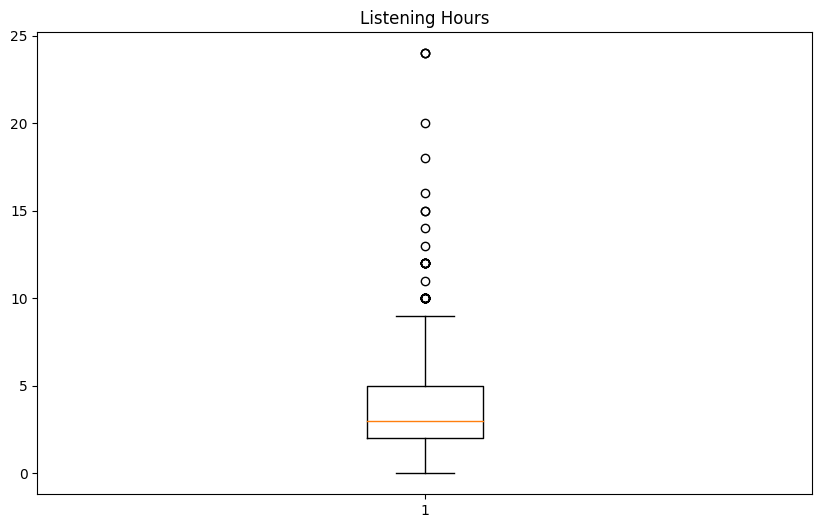

In [711]:
plt.figure(figsize=(10,6))
plt.boxplot(music['Hours per day'])
plt.title('Listening Hours')
plt.show()

In [712]:
index=[]
for i in range(len(music['Hours per day'])):
  if music['Hours per day'][i]>20:
    index.append(i)
    music.loc[i,'Hours per day']=20
print("Indexes of the replaced outliers",index)

#Listening Hour values more than 20 are saturated to 20

Indexes of the replaced outliers [18, 366, 695]


In [713]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           736 non-null    float64 
 1   Primary streaming service     736 non-null    category
 2   Hours per day                 736 non-null    float64 
 3   While working                 736 non-null    category
 4   Instrumentalist               736 non-null    category
 5   Composer                      736 non-null    category
 6   Exploratory                   736 non-null    category
 7   Foreign languages             736 non-null    category
 8   Frequency [Classical]         736 non-null    category
 9   Frequency [Country]           736 non-null    category
 10  Frequency [EDM]               736 non-null    category
 11  Frequency [Folk]              736 non-null    category
 12  Frequency [Gospel]            736 non-null    cate

**<h1>Renaming Columns :**

In [714]:
music.rename(columns={
    'Hours per day':'Listening Hours',
    'Intruementalist':'Instrumentalist  Yes/No',
    'Foreign languages':'Foreign languages Yes/No',
    'Exploratory':'Exploratory Yes/No',
    'Composer':'Composer Yes/No',
    'Primary streaming service':'Primary Streaming Service',
    'Fav genre':'Favourite Genre',
    'While working':'While Working Yes/No',
    'Music effects':'Music Effects'
    },inplace=True)
#Makes it more readable and consistent.
#Clear and descriptive column names facilitates better communication and understanding of data.

<h1><b><u>VISUALIZATION</u></b></h1>

In [715]:

my_groups=[0,20,30,40,50,60]
labels=['0-20','21-30','31-40','41-50','51-60']

music['Age Group']=pd.cut(music['Age'],my_groups,labels=labels,right=False)

age_means=music.groupby('Age Group')['Listening Hours'].mean().reset_index()



In [716]:
import plotly.express as px

fig=px.bar(age_means,x='Age Group',y='Listening Hours',title="Average Listening Hours by 'Age Group'", labels={'Age Group': "Age Group ",'Listening Hours':'Average Listening Hours'},
 color_discrete_sequence=['#0000FF'])
px
fig.update_layout(width=500,height=400)
fig.show()

#sns.barplot(x='Age Group',y='Listening Hours',data=age_means)

#plt.title('Average Listening Music Hours by Age Group')
#plt.xlabel('Age Group')
#plt.ylabel('Average Listening Hours' )

#plt.show()

The analysis highlights the differences in Listening Habits across various age groups.
**Age group '51-60' (3.92 Hours)**  spend more time in listening to music as compared to **Age group '0-20' (3.90 Hours)**

**Age group '41-50' (2.5 Hours)**  spend the least amount of time.

In [717]:
streamed_means=music.groupby('Primary Streaming Service')['Listening Hours'].mean().reset_index()
streamed_means.sort_values(by='Listening Hours',ascending=False,inplace=False)

,Primary Streaming Service,Listening Hours
4,Spotify,3.813725
0,Apple Music,3.558824
5,YouTube Music,3.220745
2,Other streaming service,2.991000
1,I do not use a streaming service.,2.954225
3,Pandora,2.136364


In [718]:
streamed_means=music.groupby('Primary Streaming Service')['Listening Hours'].mean().reset_index()
fig=px.bar(streamed_means,x='Primary Streaming Service',y='Listening Hours',title='Most Streamed Platform',labels={'Primary Streaming Service':'Streaming Platform','Listening Hours':'Hours Spent'},
color_discrete_sequence=['#FF5853'])
fig.update_layout(width=1200,height=800)
fig.show()

The above grpah shows the average Listening Hours on different Streaming Platforms


* It is seen that **Spotify** had more users on its platform **(3.81 hours).**

*   This is followed by **Apple Music** and **YoutTube Music** with an average of **3.55 Hours.**and **3.22 Hours** respectively**.**</br>

*   **Pandora** had the least users on its platform **(2.13 Hours).**






In [719]:
cross_tab_1=pd.crosstab(music['Instrumentalist'],music['Foreign languages Yes/No'])
cross_tab_1

Foreign languages Yes/No,No,Yes
Instrumentalist,,
No,220,280
Yes,108,128


<Axes: xlabel='Foreign languages Yes/No', ylabel='Instrumentalist'>

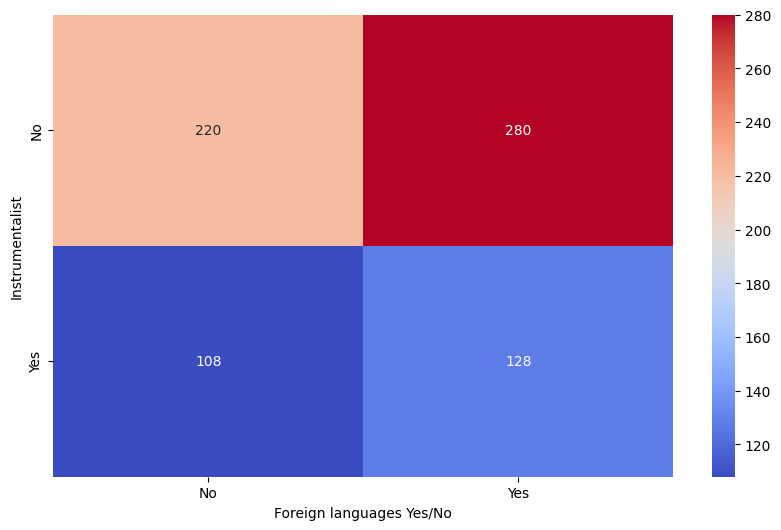

In [720]:
plt.figure(figsize=(10,6))
sns.heatmap(cross_tab_1,annot=True,fmt='d',cmap='coolwarm')

**The above analysis shows that 128 people who listen to different languages are instrumentalist.**

In [721]:
cross_tab_3=pd.crosstab(music['Music Effects'],music['Instrumentalist'])
cross_tab_3

Instrumentalist,No,Yes
Music Effects,,
Improve,355,191
No effect,129,40
Worsen,16,5


<Axes: xlabel='Instrumentalist', ylabel='Music Effects'>

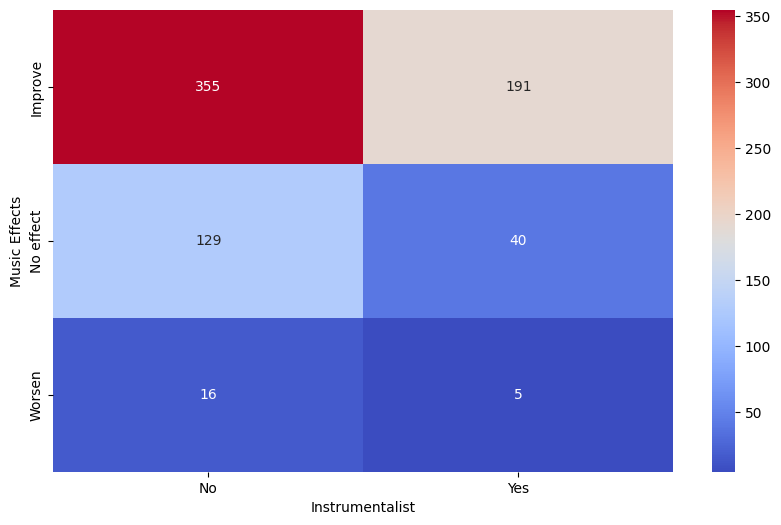

In [722]:
plt.figure(figsize=(10,6))
sns.heatmap(cross_tab_3,annot=True,fmt='d',cmap='coolwarm')

**The above analysis shows that 16 people who do not play an Instrument have a
negative effect on their health**<br>
**Whereas only 5 Instrumentalist showed bad health signs**<br>
**Playing an Instrumentalist does have some positive effect**

In [723]:
y_count=music['Favourite Genre'].value_counts()
fig=px.bar(y_count,
           x=y_count.index,
           y=y_count.values,
           labels={'x':'Genre ','y':'Count'},
           title='Top Favourite Genres',
           color_discrete_sequence=['#1250FF']
           )
fig.show()

**Rock was the most loved genre(188), followed by Pop(114) and Metal(88)**

In [724]:
yearly_listening_hours=music.groupby('Month')['Listening Hours'].sum().reset_index()
yearly_listening_hours

,Month,Listening Hours
0,August,1573.45
1,November,14.00
2,October,127.00
3,September,903.10


In [725]:
fig=px.bar(yearly_listening_hours,x='Month',
           y='Listening Hours',
title='Listening Hours By Month',
           labels={'Month':'Month','Listening Hours':'Hours Spent'},
           color='Listening Hours',
           color_continuous_scale='viridis'
           )
fig.update_layout(width=1200,height=800)
fig.show()

In [726]:
pip install  mplcursors

In [727]:
import mplcursors
genres=[
    'Frequency [Rock]',
    'Frequency [Pop]',
    'Frequency [Hip hop]',
    'Frequency [R&B]',
    'Frequency [Latin]',
    'Frequency [Folk]',
    'Frequency [Metal]',
    'Frequency [Country]',
    'Frequency [Gospel]',
    'Frequency [Rap]',
    'Frequency [Lofi]',
    'Frequency [Video game music]',
    'Frequency [EDM]',
    'Frequency [Classical]'
]


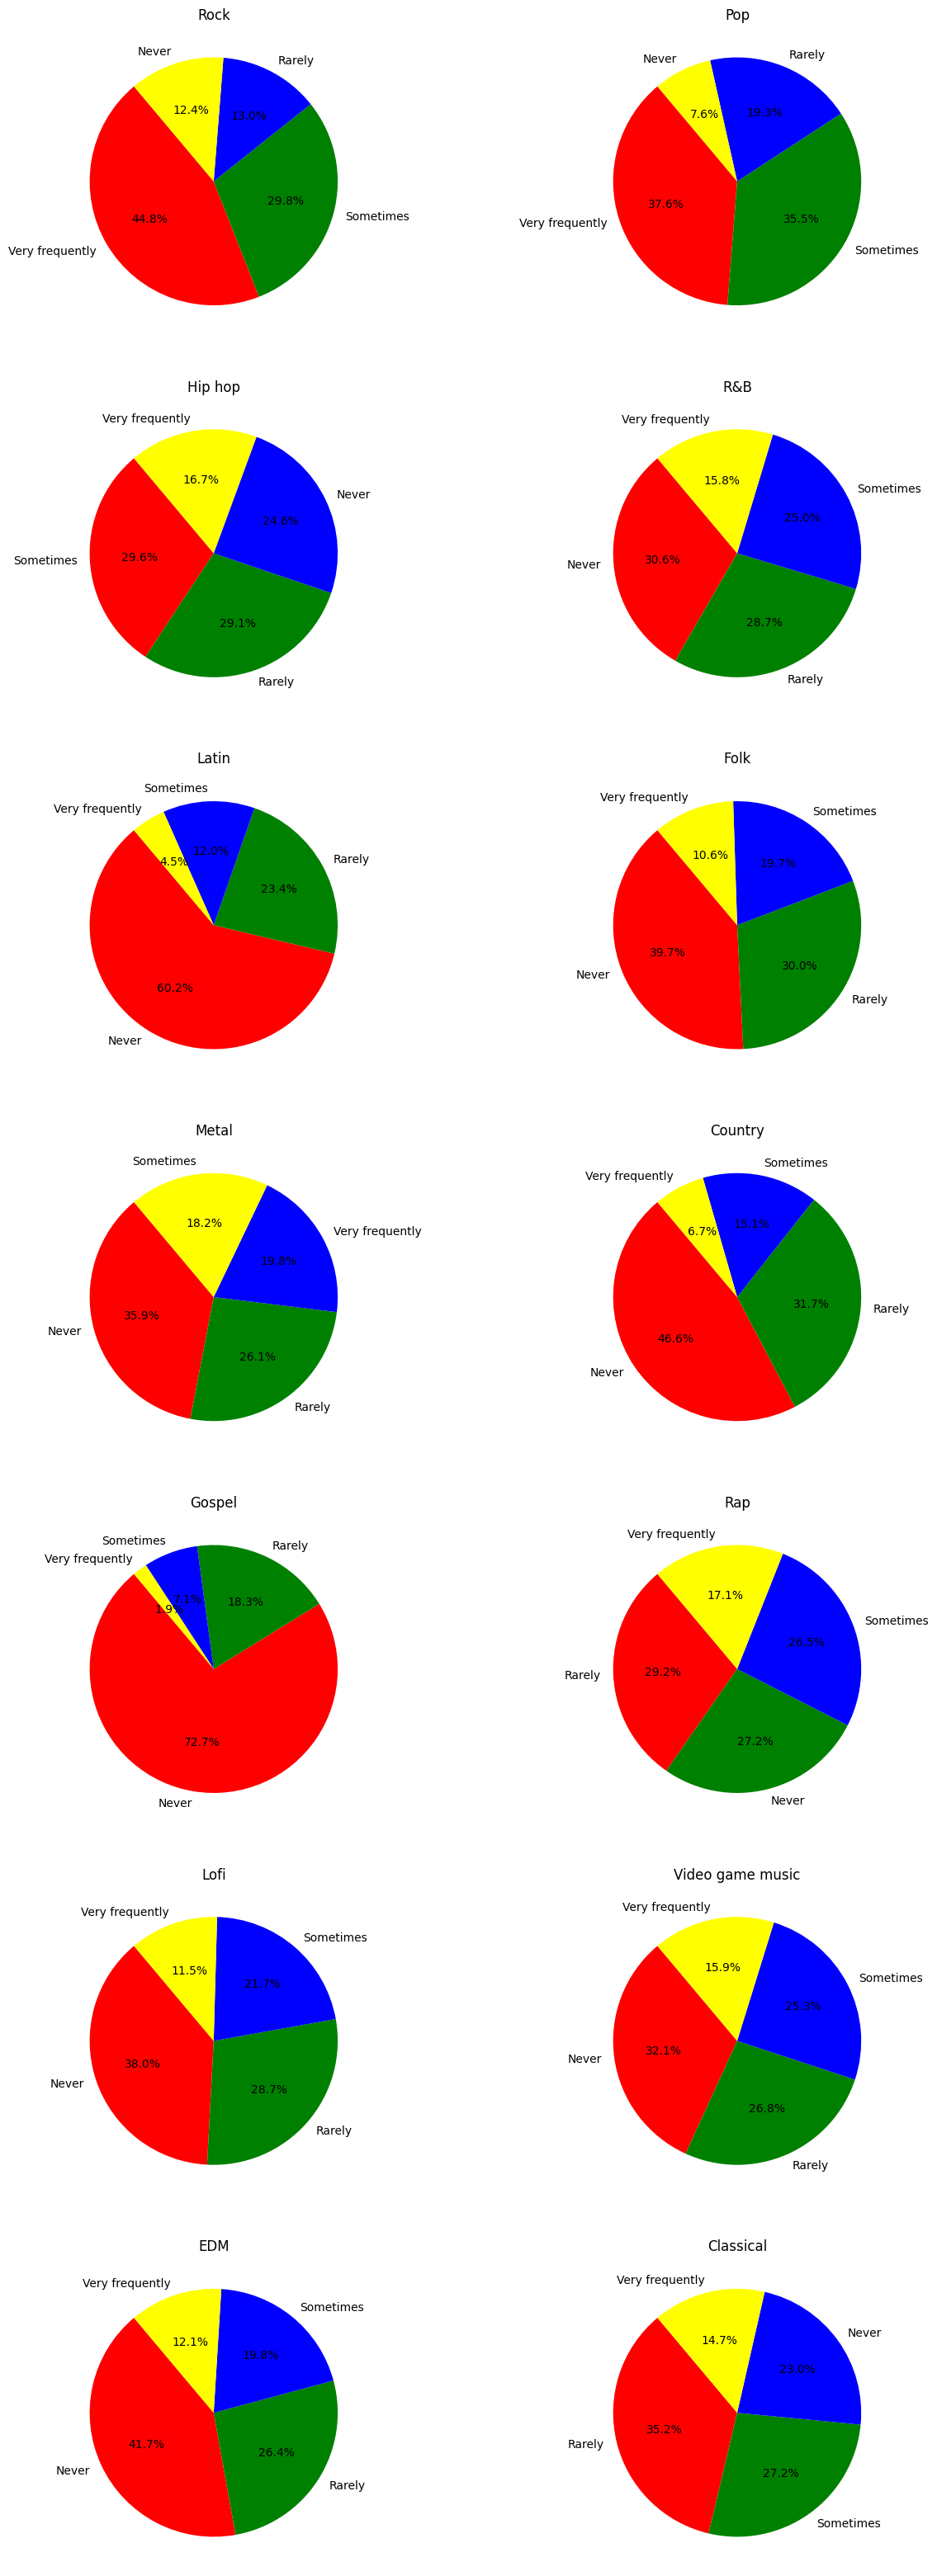

In [728]:
fig=plt.figure(figsize=(15,40))
colors=['red','green','blue','yellow','purple']
nrows=7
ncols=2
for i,genre in enumerate(genres):
  row=i//ncols
  col=i%ncols
  ax=plt.subplot2grid((nrows,ncols),(row,col))
  counts=music[genre].value_counts()
  labels=counts.index
  sizes=counts.values

  wedges,texts,autotexts=ax.pie(sizes,labels=labels,colors=colors[:len(labels)],autopct='%1.1f%%',startangle=130)
  ax.set_title(genre.replace('Frequency [','').replace(']',''))

  mplcursors.cursor(wedges,hover=True).connect(
      "add",lambda sel:sel.annotation.set_text(f"{labels[sel.index]}: {sizes[sel.index]}"))

plt.show()
# To see the proportions of each Genre

<h1><b><u>MODEL BUILDING

In [729]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [730]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

columns=['Primary Streaming Service',
        'While Working Yes/No',
        'Instrumentalist',
        'Exploratory Yes/No',
        'Foreign languages Yes/No',
        'Composer Yes/No',
        'Frequency [Rock]',
        'Frequency [Pop]',
        'Frequency [Hip hop]',
        'Frequency [R&B]',
        'Frequency [Latin]',
        'Frequency [Folk]',
        'Frequency [Jazz]',
        'Frequency [K pop]',
        'Frequency [Metal]',
        'Frequency [Country]',
        'Frequency [Gospel]',
        'Frequency [Rap]',
        'Frequency [Lofi]',
        'Frequency [Video game music]',
        'Frequency [EDM]',
        'Frequency [Classical]',
        'Favourite Genre',
         'Month',
         'Music Effects']
for i in columns:
  music[i]=label_encoder.fit_transform(music[i])


Categorical variables need to be transformed into a numerical format as the model requires numerical input.

In [731]:
music

,Age,Primary Streaming Service,Listening Hours,While Working Yes/No,Instrumentalist,Composer Yes/No,Exploratory Yes/No,Foreign languages Yes/No,Frequency [Classical],Frequency [Country],...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music Effects,Favourite Genre,Month,Age Group
0,18.0,4,3.0,1,1,1,1,1,1,0,...,0,2,3,0,1,0,0,8,0,0-20
1,63.0,3,1.5,1,0,0,1,0,2,0,...,3,1,7,2,2,1,2,14,0,NaN
2,18.0,4,4.0,0,0,0,0,1,0,0,...,1,3,7,7,10,2,1,15,0,0-20
3,61.0,5,2.5,1,0,1,1,1,2,0,...,0,0,9,7,3,3,0,6,0,NaN
4,18.0,4,4.0,1,0,0,1,0,0,0,...,0,1,7,2,5,9,0,12,0,0-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,4,2.0,1,1,0,1,1,3,1,...,3,0,7,6,0,9,0,14,2,0-20
732,18.0,4,1.0,1,1,0,1,1,1,1,...,2,2,3,2,2,5,0,11,1,0-20
733,19.0,2,6.0,1,0,1,1,0,1,2,...,1,1,2,2,2,2,0,13,1,0-20
734,19.0,4,5.0,1,1,0,0,0,3,0,...,0,2,2,3,2,1,0,0,1,0-20


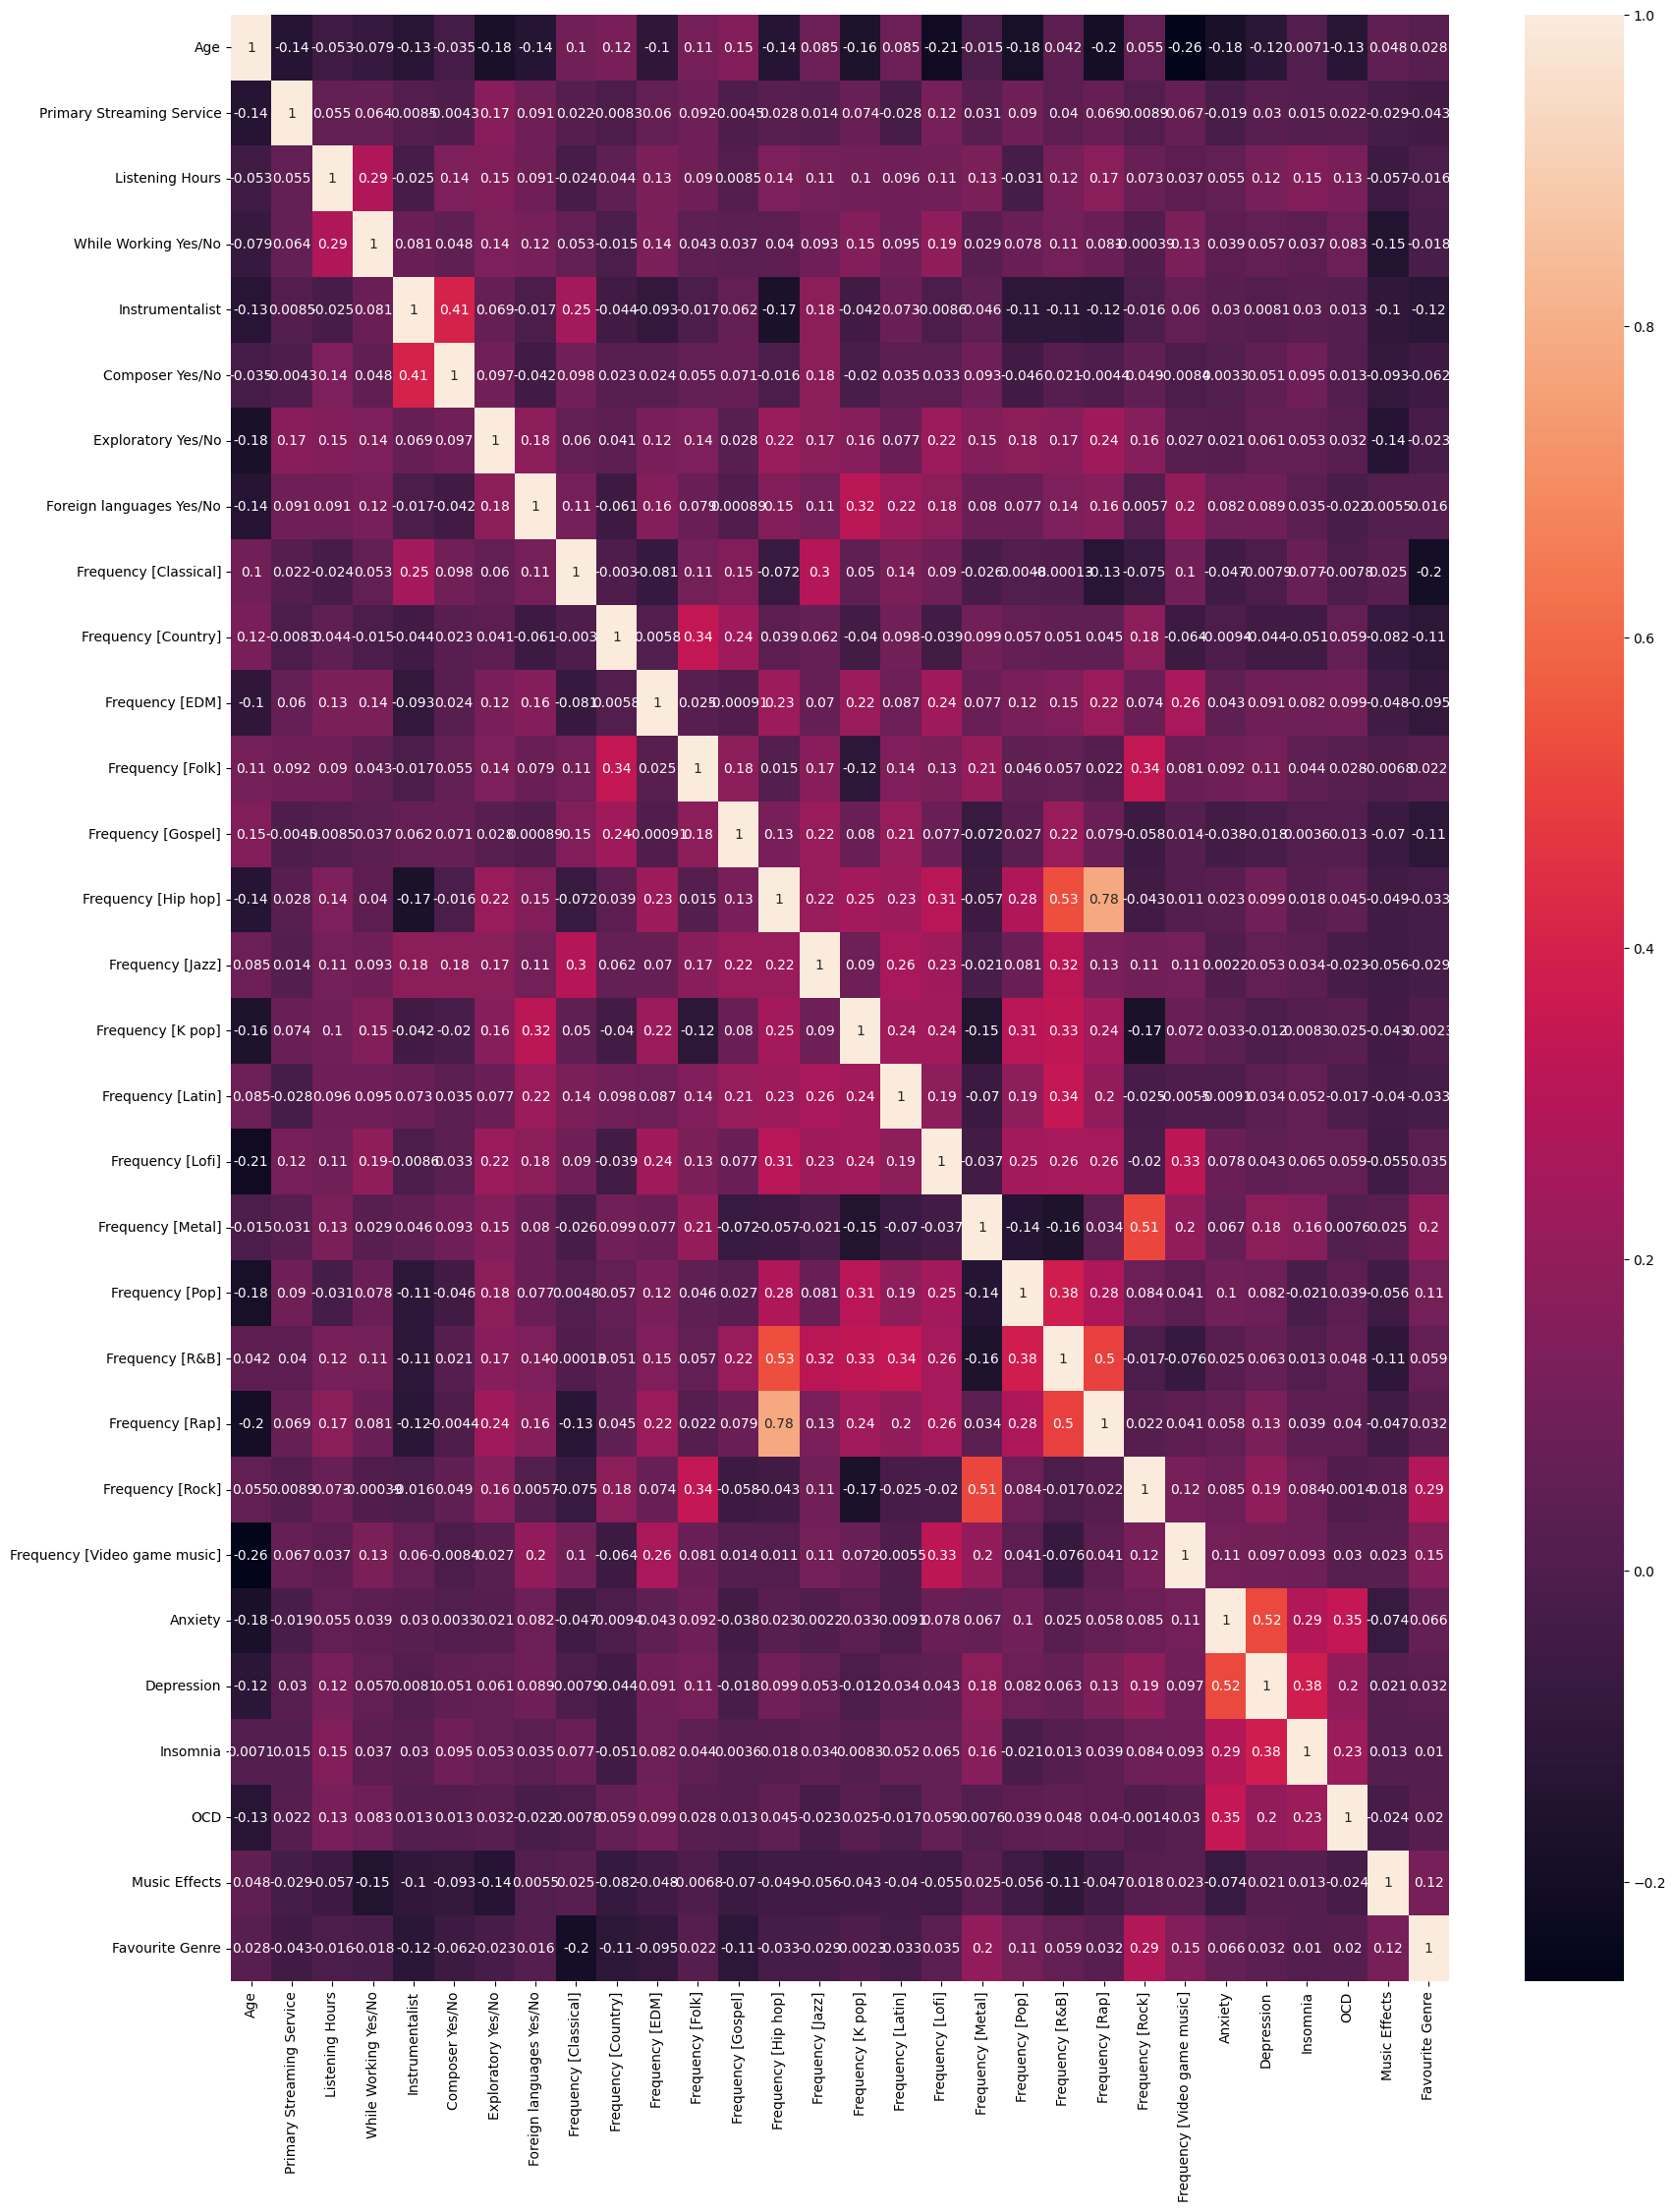

In [732]:
plt.figure(figsize=(20,26))
sns.heatmap(music.drop(columns={"Month","Age Group"}).corr(),annot=True)
plt.show()

In [733]:
music['Favourite Genre'].unique()

array([ 8, 14, 15,  6, 12,  7,  1,  2,  5, 11, 13,  0, 10,  3,  9,  4])

In [734]:
X=music.drop(columns={"Favourite Genre","Instrumentalist","Composer Yes/No","Age Group","OCD","Insomnia","Primary Streaming Service","Month"})
y=music['Favourite Genre']

#Dropping the Unnecessary columns

In [735]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [736]:
X_train.columns

Index(['Age', 'Listening Hours', 'While Working Yes/No', 'Exploratory Yes/No',
       'Foreign languages Yes/No', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Music Effects'],
      dtype='object')

In [737]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model=LogisticRegression(max_iter=1603,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

r_square=r2_score(y_test,y_pred)
adjusted_r2_dt=1-((1-r_square)*(737-1)/(736-24-1))

print("\033[1m Mean Squared Error:\033[0m",mean_squared_error(y_test,y_pred))
print("\033[1m Accuracy Score:\033[0m",accuracy_score(y_test,y_pred))
print("\033[1m R-Squared:\033[0m",r_square)
print("\033[1m Adjusted R2 Score: \033[0m",adjusted_r2_dt)

 Mean Squared Error: 16.83783783783784
 Accuracy Score: 0.6351351351351351
 R-Squared: 0.306199537988066
 Adjusted R2 Score:  0.2818043037401077
